During this NLP analysis you will see a comparison of governmental speeches on January 7 and March 17, what it is about and how the change of covid-19 situation is affecting the talks around it.

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import nltk
import re
from nltk.corpus import stopwords
stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import word_tokenize


import string
import re
import pandas as pd

import matplotlib.pyplot as plt
from wordcloud import WordCloud 

In [2]:
url1 = 'https://www.gov.uk/government/speeches/prime-ministers-statement-on-coronavirus-covid-19-7-january-2021'
url2 = 'https://www.gov.uk/government/speeches/health-and-social-care-secretarys-statement-on-coronavirus-covid-19-17-march-2021'

In [3]:
r1_jan7 = requests.get(url1)
r1_jan7.encoding='utf-8'
html=r1_jan7.text
print(html)

<!DOCTYPE html>
<!--[if lt IE 9]><html class="lte-ie8" lang="en"><![endif]--><!--[if gt IE 8]><!--><html lang="en">
<!--<![endif]-->
  <head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<meta property="og:image:alt" content="The Rt Hon Boris Johnson MP">
<meta property="og:image" content="https://assets.publishing.service.gov.uk/government/uploads/system/uploads/person/image/2792/10_Downing_Street.jpg">
<meta property="og:description" content="Prime Minister Boris Johnson gave a statement at the coronavirus press conference.">
<meta property="og:title" content="Prime Minister's statement on coronavirus (COVID-19): 7 January 2021">
<meta property="og:url" content="https://www.gov.uk/government/speeches/prime-ministers-statement-on-coronavirus-covid-19-7-january-2021">
<meta property="og:type" content="article">
<meta property="og:site_name" content="GOV.UK">
<meta name="twitter:image:alt" content="The Rt Hon Boris Johnson MP">
<meta name="twitter:image" content="

In [4]:
r1_mar17 = requests.get(url2)
r1_mar17.encoding='utf-8'
html=r1_mar17.text
print(html)

<!DOCTYPE html>
<!--[if lt IE 9]><html class="lte-ie8" lang="en"><![endif]--><!--[if gt IE 8]><!--><html lang="en">
<!--<![endif]-->
  <head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<meta property="og:image:alt" content="The Rt Hon Matt Hancock MP">
<meta property="og:image" content="https://assets.publishing.service.gov.uk/government/uploads/system/uploads/person/image/334/Matt_Hancock_May2015_GOVUK.jpg">
<meta property="og:description" content="Speech by Secretary of State for Health and Social Care Matt Hancock at the Downing Street coronavirus briefing.">
<meta property="og:title" content="Health and Social Care Secretary's statement on coronavirus (COVID-19): 17 March 2021">
<meta property="og:url" content="https://www.gov.uk/government/speeches/health-and-social-care-secretarys-statement-on-coronavirus-covid-19-17-march-2021">
<meta property="og:type" content="article">
<meta property="og:site_name" content="GOV.UK">
<meta name="twitter:image:alt" cont

In [5]:
content_jan7 = bs(r1_jan7.content, 'html.parser')
text_jan7 = [p.text for p in content_jan7.find_all('p')]
text_jan7 

['We use some essential cookies to make this website work.',
 'We’d like to set additional cookies to understand how you use GOV.UK, remember your settings and improve government services.',
 'We also use cookies set by other sites to help us deliver content from their services.',
 'You can change your cookie settings at any time.',
 'Prime Minister Boris Johnson gave a statement at the coronavirus press conference.',
 'Prime Minister’s statement on coronavirus (COVID-19): 7 January 2021',
 'Good afternoon, today I’m joined by Sir Simon Stevens, Chief Executive of NHS England',
 'and Brigadier Phil Prosser, who is Commander of Military Support to the Vaccine Delivery Programme across our United Kingdom.',
 'Because I know there is now one question at the very top of your minds',
 'and that is how fast and how effectively we can get these millions of new vaccines into the arms of the most vulnerable and those who need them most.',
 'And you want to know that we in government,',
 'the NH

In [6]:
type(text_jan7)

list

In [7]:
text_jan7=str(text_jan7)
type(text_jan7)

str

In [8]:
content_mar17 = bs(r1_mar17.content, 'html.parser')
text_mar17 = [p.text for p in content_mar17.find_all('p')]
text_mar17=str(text_mar17)
text_mar17


"['We use some essential cookies to make this website work.', 'We’d like to set additional cookies to understand how you use GOV.UK, remember your settings and improve government services.', 'We also use cookies set by other sites to help us deliver content from their services.', 'You can change your cookie settings at any time.', 'Speech by Secretary of State for Health and Social Care Matt Hancock at the Downing Street coronavirus briefing.', 'Good afternoon and welcome to Downing Street for today’s coronavirus briefing.', 'I’m joined by Professor Jonathan Van Tam, Deputy Chief Medical Officer, and Dr Mary Ramsay, Head of Immunisation at Public Health England.', 'I’ve got some fantastic news to bring you today on the success of the vaccination rollout and the protection that it’s bringing right across the United Kingdom right now.', 'Yesterday, we delivered 529,119 vaccinations. More than half a million.', 'And that means that today, exactly 100 days since Margaret Keenan got the fir

# Cleaning The Data

cleaning steps on all text:

- Make text all lower case
- Remove punctuation
- Remove numerical values
- Remove common non-sensical text (/n)
- Tokenize text
- Remove stop words

In [9]:
##remove stopwords here so all shortenings will be cleaned
#or expand shortenings

CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [10]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [11]:
def clean_text(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_clean1 = re.sub('\s+', ' ', text_nopunct).strip()
    text_clean2 = re.sub('[‘’“”…]', '', text_clean1).strip()
    text_clean = re.sub('\n', '', text_clean2).strip()
    return text_clean



In [12]:
jan7_clean1=expand_contractions(text_jan7)


In [13]:
jan7_clean= clean_text(jan7_clean1)
jan7_clean

'we use some essential cookies to make this website work wed like to set additional cookies to understand how you use govuk remember your settings and improve government services we also use cookies set by other sites to help us deliver content from their services you can change your cookie settings at any time prime minister boris johnson gave a statement at the coronavirus press conference prime ministers statement on coronavirus covid january good afternoon today im joined by sir simon stevens chief executive of nhs england and brigadier phil prosser who is commander of military support to the vaccine delivery programme across our united kingdom because i know there is now one question at the very top of your minds and that is how fast and how effectively we can get these millions of new vaccines into the arms of the most vulnerable and those who need them most and you want to know that we in government the nhs the armed forces local and regional government government at every level

In [14]:
tokens_jan7 = word_tokenize(jan7_clean)

clean_tokens_jan7 = [word for word in tokens_jan7 if not word in stopwords.words()]

print(clean_tokens_jan7)

['use', 'essential', 'cookies', 'make', 'website', 'work', 'wed', 'like', 'set', 'additional', 'cookies', 'understand', 'use', 'govuk', 'remember', 'settings', 'improve', 'government', 'services', 'use', 'cookies', 'set', 'sites', 'help', 'us', 'deliver', 'content', 'services', 'change', 'cookie', 'settings', 'time', 'prime', 'minister', 'boris', 'johnson', 'gave', 'statement', 'coronavirus', 'press', 'conference', 'prime', 'ministers', 'statement', 'coronavirus', 'covid', 'january', 'good', 'afternoon', 'today', 'joined', 'sir', 'simon', 'stevens', 'chief', 'executive', 'nhs', 'england', 'brigadier', 'phil', 'prosser', 'commander', 'military', 'support', 'vaccine', 'delivery', 'programme', 'across', 'united', 'kingdom', 'know', 'question', 'top', 'minds', 'fast', 'effectively', 'get', 'millions', 'new', 'vaccines', 'arms', 'vulnerable', 'need', 'know', 'government', 'nhs', 'armed', 'forces', 'local', 'regional', 'government', 'government', 'every', 'level', 'truly', 'throwing', 'every

In [15]:
#now we do the same for the speech dated March 17
mar17_clean1=expand_contractions(text_mar17)
mar17_clean= clean_text(mar17_clean1)

tokens_mar17 = word_tokenize(mar17_clean)

clean_tokens_mar17 = [word for word in tokens_mar17 if not word in stopwords.words()]

print(clean_tokens_mar17)

['use', 'essential', 'cookies', 'make', 'website', 'work', 'wed', 'like', 'set', 'additional', 'cookies', 'understand', 'use', 'govuk', 'remember', 'settings', 'improve', 'government', 'services', 'use', 'cookies', 'set', 'sites', 'help', 'us', 'deliver', 'content', 'services', 'change', 'cookie', 'settings', 'time', 'speech', 'secretary', 'state', 'health', 'social', 'matt', 'hancock', 'downing', 'street', 'coronavirus', 'briefing', 'good', 'afternoon', 'welcome', 'downing', 'street', 'todays', 'coronavirus', 'briefing', 'joined', 'professor', 'jonathan', 'tam', 'deputy', 'chief', 'medical', 'officer', 'dr', 'mary', 'ramsay', 'head', 'immunisation', 'public', 'health', 'england', 'ive', 'got', 'fantastic', 'news', 'bring', 'today', 'success', 'vaccination', 'rollout', 'protection', 'bringing', 'right', 'across', 'united', 'kingdom', 'right', 'yesterday', 'delivered', 'vaccinations', 'half', 'million', 'means', 'today', 'exactly', 'days', 'since', 'margaret', 'keenan', 'got', 'first', 

In [16]:

#building a frequency distribution via construction of the nltk.FreqDist class with a word list

fd_jan7 = nltk.FreqDist(clean_tokens_jan7).most_common(40)
fd_jan7

[('vaccine', 8),
 ('nhs', 7),
 ('government', 6),
 ('national', 6),
 ('today', 5),
 ('vaccines', 5),
 ('vaccination', 5),
 ('everyone', 5),
 ('first', 5),
 ('use', 4),
 ('like', 4),
 ('set', 4),
 ('time', 4),
 ('know', 4),
 ('million', 4),
 ('people', 4),
 ('cookies', 3),
 ('sites', 3),
 ('help', 3),
 ('us', 3),
 ('england', 3),
 ('across', 3),
 ('new', 3),
 ('local', 3),
 ('course', 3),
 ('effort', 3),
 ('th', 3),
 ('groups', 3),
 ('home', 3),
 ('staff', 3),
 ('lives', 3),
 ('available', 3),
 ('lifesaving', 3),
 ('–', 3),
 ('make', 2),
 ('wed', 2),
 ('understand', 2),
 ('govuk', 2),
 ('settings', 2),
 ('improve', 2)]

In [17]:
fd_mar17 = nltk.FreqDist(clean_tokens_mar17).most_common(40)
fd_mar17

[('people', 13),
 ('protection', 11),
 ('vaccine', 10),
 ('get', 9),
 ('us', 8),
 ('today', 7),
 ('jab', 7),
 ('around', 7),
 ('–', 6),
 ('shows', 6),
 ('safe', 6),
 ('ive', 5),
 ('right', 5),
 ('cent', 5),
 ('groups', 5),
 ('like', 4),
 ('time', 4),
 ('got', 4),
 ('million', 4),
 ('vaccinated', 4),
 ('weve', 4),
 ('country', 4),
 ('covid', 4),
 ('antibodies', 4),
 ('getting', 4),
 ('yet', 4),
 ('vulnerable', 4),
 ('use', 3),
 ('cookies', 3),
 ('make', 3),
 ('set', 3),
 ('government', 3),
 ('health', 3),
 ('vaccination', 3),
 ('since', 3),
 ('first', 3),
 ('huge', 3),
 ('done', 3),
 ('really', 3),
 ('impact', 3)]

<AxesSubplot:>

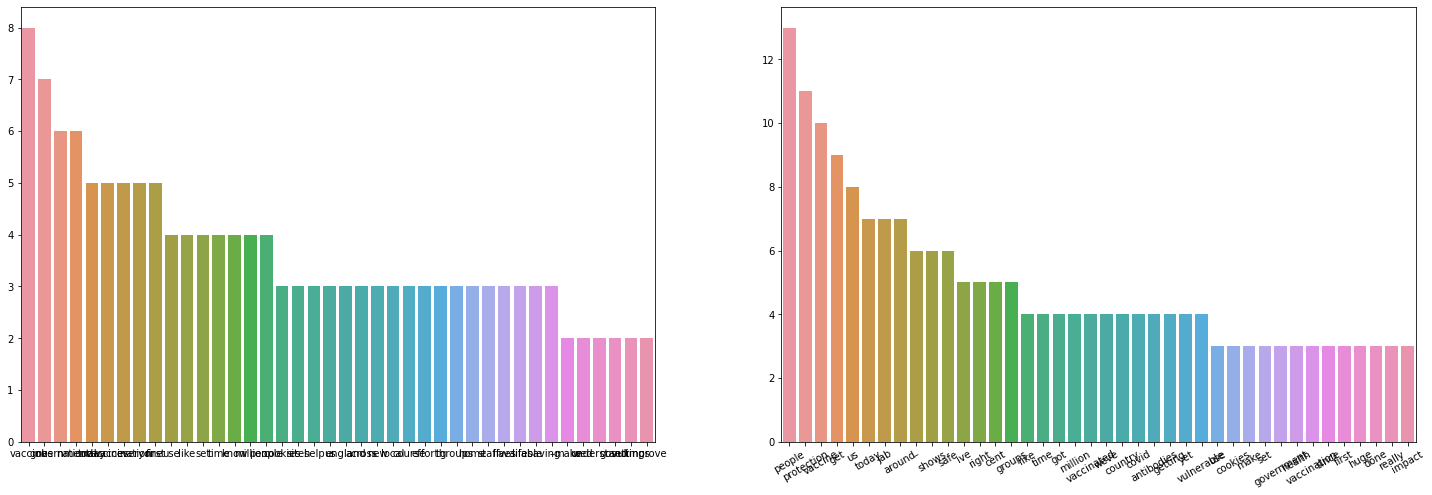

In [86]:
import seaborn as sns
## Convert to Pandas series via Python Dictionary for easier plotting
pd_fd_jan7 = pd.Series(dict(fd_jan7))
pd_fd_mar17 = pd.Series(dict(fd_mar17))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,8)) # create the axes


sns.barplot(x=pd_fd_jan7.index, y=pd_fd_jan7.values, ax=axes[0])
plt.xticks(rotation=30)

sns.barplot(x=pd_fd_mar17.index, y=pd_fd_mar17.values, ax=axes[1])

# Set the ticks rotation for all subplots
#plt.xticks(rotation=30)

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
#all_plot = sns.barplot(x=pd_fd.index, y=pd_fd.values, ax=ax)


In [50]:
str_clean_tokens_jan7=str(clean_tokens_jan7)
str_clean_tokens_mar17=str(clean_tokens_mar17)


In [ ]:
wordcloud = WordCloud(width = 1600, height = 800, 
                      background_color ='white').generate(''.join(str_clean_tokens_jan7)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:
bigrm = list(nltk.bigrams(str_clean_tokens_jan7.split()))
freq_bigrm = nltk.FreqDist(bigrm)
freq_bigrm

In [ ]:
trigrm = list(nltk.trigrams(str_clean_tokens_jan7.split()))
freq_trigrm = nltk.FreqDist(trigrm)
freq_trigrm